Libraries loaded.
Files loaded.
Train shape: (1017209, 9)
Test shape: (41088, 8)
Store shape: (1115, 10)
ROSSMANN INDIVIDUAL DATASET ANALYSIS
Analysis Date: 2025-07-13 21:47:18 UTC
Analyst: Shahpure15
Datasets loaded successfully!
Train: (1017209, 9)
Test: (41088, 8)
Store: (1115, 10)

Train.csv - TRANSACTION DATA ANALYSIS

 Dataset overview:
Shape: (1017209, 9)
Column: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Date Range: 01-01-2013 to 31-12-2014
Unique Stores: 1115
Total Records: 1,017,209

 Missing values check:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

 Sales performance metrics:
 Average Daily Sales: €5773.82
 Median Sales: €5744.00
 Min Sales: €0.00
 Max Sales: €41551.00
 Standard Deviation: €3849.93

 Distribution Characteristics:
Skewness: 0.641
Kurtosis: 1.778
Zero Sales Days:

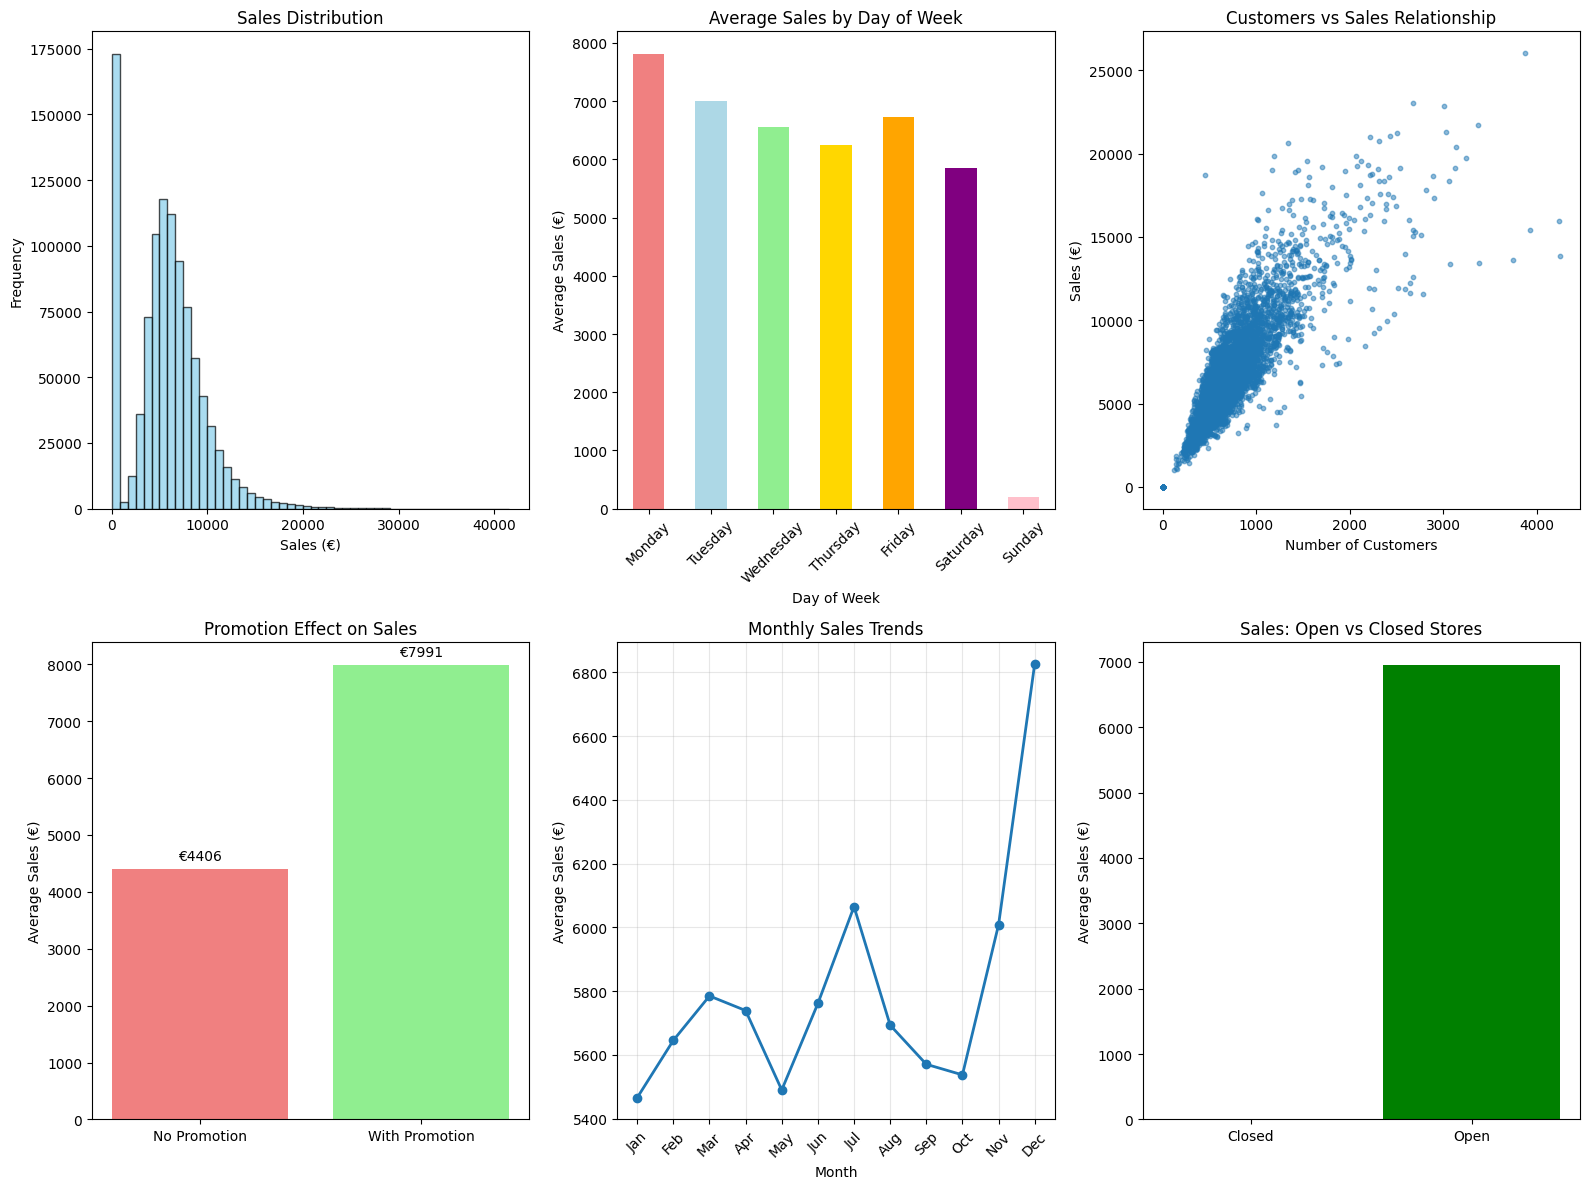


 Train.csv Analysis Complete!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries loaded.")


#Data loading and checking shape for basic understanding


train = pd.read_csv("D:/BTD/rossman-eda-ml/data/raw/train.csv",dtype={'StateHoliday': 'str'})
test = pd.read_csv("D:/BTD/rossman-eda-ml/data/raw/test.csv")
store = pd.read_csv("D:/BTD/rossman-eda-ml/data/raw/store.csv")

print("Files loaded.")
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Store shape:", store.shape)

print("Datasets loaded successfully!")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")
print(f"Store: {store.shape}")
print("\n" + "="*60)
print("Train.csv - TRANSACTION DATA ANALYSIS")
print("="*60)

# Basic info
print("\n Dataset overview:")
print(f"Shape: {train.shape}")
print(f"Column: {list(train.columns)}")
print(f"Date Range: {train['Date'].min()} to {train['Date'].max()}")
print(f"Unique Stores: {train['Store'].nunique()}")
print(f"Total Records: {len(train):,}")

# Missing values
print("\n Missing values check:")
missing_values = train.isnull().sum()
print(missing_values)

# Sales Analysis
print("\n Sales performance metrics:")
sales_stats = train['Sales'].describe()
print(f" Average Daily Sales: €{sales_stats['mean']:.2f}")
print(f" Median Sales: €{sales_stats['50%']:.2f}")
print(f" Min Sales: €{sales_stats['min']:.2f}")
print(f" Max Sales: €{sales_stats['max']:.2f}")
print(f" Standard Deviation: €{sales_stats['std']:.2f}")

# Skewness and Kurtosis
print(f"\n Distribution Characteristics:")
print(f"Skewness: {train['Sales'].skew():.3f}")
print(f"Kurtosis: {train['Sales'].kurtosis():.3f}")
print(f"Zero Sales Days: {len(train[train['Sales'] == 0]):,} ({len(train[train['Sales'] == 0])/len(train)*100:.1f}%)")

# Day of Week Analysis
print(f"\n Weekly Sales pattern:")
dow_sales = train.groupby('DayOfWeek')['Sales'].mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(day_names, 1):
    print(f"{day}: €{dow_sales[i]:.2f}")

# Holiday Analysis
print(f"\n HOLIDAY IMPACT:")
holiday_counts = train['StateHoliday'].value_counts()
print(f"Regular Days: {holiday_counts.get('0', 0):,}")
print(f"Public Holidays: {holiday_counts.get('a', 0):,}")
print(f"Easter Holidays: {holiday_counts.get('b', 0):,}")
print(f"Christmas: {holiday_counts.get('c', 0):,}")

# Promotion Analysis
print(f"\nPROMOTION EFFECTIVENESS:")
promo_stats = train.groupby('Promo')['Sales'].agg(['mean', 'count'])
print(f"No Promotion: €{promo_stats.loc[0, 'mean']:.2f} (n={promo_stats.loc[0, 'count']:,})")
print(f"With Promotion: €{promo_stats.loc[1, 'mean']:.2f} (n={promo_stats.loc[1, 'count']:,})")
print(f"Promotion Lift: +{((promo_stats.loc[1, 'mean'] / promo_stats.loc[0, 'mean'] - 1) * 100):.1f}%")

# Visualizations for Train Data
plt.figure(figsize=(16, 12))

# Sales distribution
plt.subplot(2, 3, 1)
plt.hist(train['Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales (€)')
plt.ylabel('Frequency')

# Sales by day of week
plt.subplot(2, 3, 2)
dow_sales.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'orange', 'purple', 'pink'])
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales (€)')
plt.xticks(range(7), day_names, rotation=45)

# Customers vs Sales
plt.subplot(2, 3, 3)
sample_data = train.sample(5000)
plt.scatter(sample_data['Customers'], sample_data['Sales'], alpha=0.5, s=10)
plt.title('Customers vs Sales Relationship')
plt.xlabel('Number of Customers')
plt.ylabel('Sales (€)')

# Promotion effect
plt.subplot(2, 3, 4)
promo_effect = train.groupby('Promo')['Sales'].mean()
bars = plt.bar(['No Promotion', 'With Promotion'], promo_effect.values, color=['lightcoral', 'lightgreen'])
plt.title('Promotion Effect on Sales')
plt.ylabel('Average Sales (€)')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'€{height:.0f}', ha='center', va='bottom')

# Monthly trends (convert date first)
plt.subplot(2, 3, 5)
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].dt.month
monthly_sales = train.groupby('Month')['Sales'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(range(1, 13), monthly_sales.values, marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Average Sales (€)')
plt.xticks(range(1, 13), months, rotation=45)
plt.grid(True, alpha=0.3)

# Sales when store is closed
plt.subplot(2, 3, 6)
open_sales = train.groupby('Open')['Sales'].mean()
plt.bar(['Closed', 'Open'], open_sales.values, color=['red', 'green'])
plt.title('Sales: Open vs Closed Stores')
plt.ylabel('Average Sales (€)')

plt.tight_layout()
plt.show()

print(f"\n Train.csv Analysis Complete!")